In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

AMD Stock, 2000-01-01 : 2010-01-01
10 years used as training data

In [2]:
#importing the dataset
# load the file contents
dataset_train = pd.read_csv('AMD_Training_Data.csv')
# Create a subtable of relevant entries (open values)
# The .values makes this vector a numpy array
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
# import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# create a scaler instance to rescale all data to the range of 0.0 to 1.0 
sc = MinMaxScaler(feature_range = (0, 1))
# create the actual training set of scaled values
training_set_scaled = sc.fit_transform(training_set)

In [4]:
days = 90

In [5]:
#last 10 years
X_train = [] 
# the stock price today
y_train = [] 

for i in range(days, len(training_set)): 
    X_train.append(training_set_scaled[i-days:i, 0]) 
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping the data matrix
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
neurons = 100

Using rmsprop Optimizer

In [9]:
# Initialising the RNN as a sequence of layers
regressor = Sequential()

In [10]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = neurons, return_sequences = True, input_shape =  (X_train.shape[1], 1)))
# the argument is the dropout rate to ignore in the layers (20%),
# units * 20% = 10 units will be dropped each time
regressor.add(Dropout(0.2))

In [11]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = neurons, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = neurons, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
# we removed the return_sequences because we no longer return a sequence but a value instead
regressor.add(LSTM(units = neurons))
regressor.add(Dropout(0.2))

In [12]:
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [13]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 70, batch_size = 96)

Epoch 1/70
2426/2426 [==============================] - 21s 9ms/step - loss: 0.1552
Epoch 2/70
2426/2426 [==============================] - 19s 8ms/step - loss: 0.0050
Epoch 3/70
2426/2426 [==============================] - 19s 8ms/step - loss: 0.0102
Epoch 4/70
2426/2426 [==============================] - 18s 7ms/step - loss: 0.0109
Epoch 5/70
2426/2426 [==============================] - 18s 7ms/step - loss: 0.0091
Epoch 6/70
2426/2426 [==============================] - 18s 7ms/step - loss: 0.0067
Epoch 7/70
2426/2426 [==============================] - 18s 7ms/step - loss: 0.0065
Epoch 8/70
2426/2426 [==============================] - 18s 7ms/step - loss: 0.0056
Epoch 9/70
2426/2426 [==============================] - 18s 7ms/step - loss: 0.0049
Epoch 10/70
2426/2426 [==============================] - 18s 7ms/step - loss: 0.0045
Epoch 11/70
2426/2426 [==============================] - 18s 7ms/step - loss: 0.0047
Epoch 12/70
2426/2426 [==============================] - 18s 7ms/step - lo

Getting the real AMD stock prices for 2017-10-07 : 2018-01-07
1 year used as testing data

In [14]:
dataset_test = pd.read_csv('AMD_Testing_Data.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

Predicting AMD stock prices for 2017-10-07 : 2018-01-07
Predicting 1 year of data

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 
inputs = dataset_total[len(dataset_total) - len(dataset_test) - days:].values
inputs = inputs.reshape(-1,1) 
inputs = sc.transform(inputs)

In [16]:
X_test = []
for i in range(days, len(real_stock_price) + days): 
    X_test.append(inputs[i-days:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 

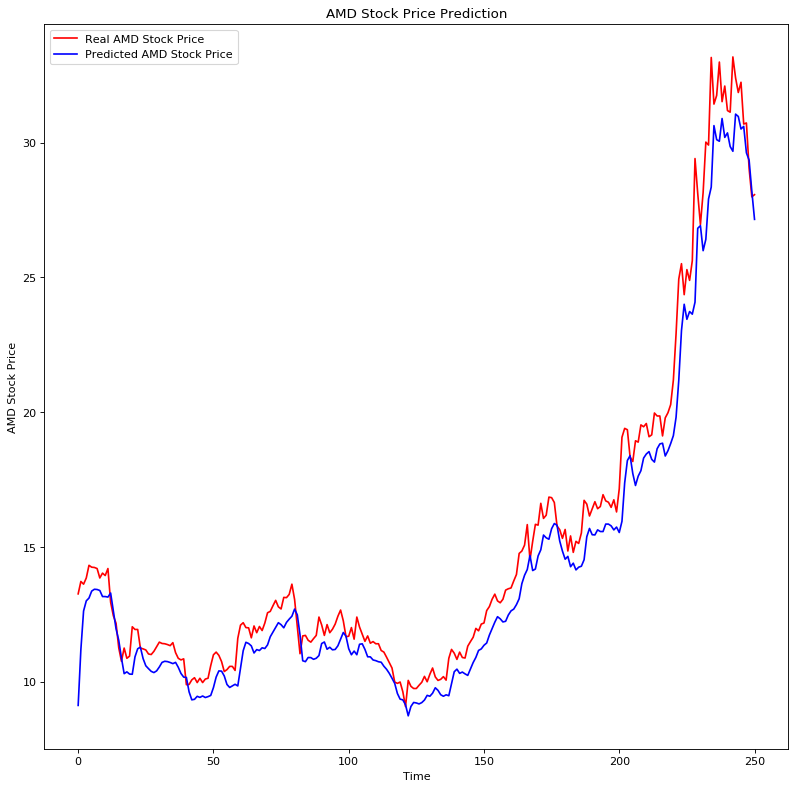

In [21]:
# Visualising the results
plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(real_stock_price, color = 'red', label = 'Real AMD Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted AMD Stock Price')
plt.title('AMD Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()

In [18]:
import math
from sklearn.metrics import mean_squared_error

In [19]:
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

1.2088610793793924